Este trecho de código realiza as seguintes importações necessárias para a construção e treinamento de um modelo de aprendizado profundo utilizando a biblioteca PyTorch:

1. `import torch`: Importa a biblioteca principal do PyTorch, que é usada para criar e manipular tensores, construir modelos de redes neurais, e realizar operações de aprendizado profundo.

2. `import torchvision.transforms as transforms`: Importa o módulo de transformações do `torchvision`, que é utilizado para realizar transformações e aumentações de dados em imagens, como redimensionamento, normalização, e rotação.

3. `from torchvision import datasets, models`: Importa os módulos de datasets e modelos do `torchvision`. O módulo `datasets` é usado para carregar conjuntos de dados populares, enquanto o módulo `models` fornece arquiteturas de redes neurais pré-treinadas.

4. `from torch.utils.data import DataLoader`: Importa o `DataLoader` do PyTorch, que é utilizado para carregar dados em mini-lotes, embaralhar os dados, e realizar operações de multiprocessamento para acelerar o treinamento.

5. `import torch.nn as nn`: Importa o módulo de redes neurais (`nn`) do PyTorch, que contém classes e funções para construir camadas de redes neurais, como camadas convolucionais, camadas totalmente conectadas, e funções de ativação.

6. `import torch.optim as optim`: Importa o módulo de otimização (`optim`) do PyTorch, que fornece algoritmos de otimização como SGD, Adam, e RMSprop, utilizados para ajustar os pesos do modelo durante o treinamento.

In [2]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

A função `transforms.Compose` é utilizada para compor várias transformações de imagem em uma única operação. No código abaixo, várias transformações são aplicadas às imagens de entrada para preparar os dados para o treinamento de um modelo de aprendizado profundo. Aqui está a descrição de cada transformação:

1. `transforms.Resize((224, 224))`: Redimensiona a imagem para 224x224 pixels.

2. `transforms.RandomRotation(10)`: Aplica uma rotação aleatória de até 10 graus.

3. `transforms.RandomHorizontalFlip()`: Aplica uma inversão horizontal aleatória.

4. `transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)`:  Ajusta aleatoriamente o brilho, contraste, saturação e matiz da imagem.

5. `transforms.ToTensor()`: Converte a imagem em um tensor.

6. `transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])`: Normaliza a imagem com médias e desvios padrão específicos.

In [ ]:

transform = transforms.Compose([
    transforms.Resize((224, 224)),                  
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])    
])


Este trecho de código carrega conjuntos de dados de imagens para treinamento e teste, aplicando transformações definidas anteriormente, e prepara os dados para serem utilizados em um modelo de aprendizado profundo. Aqui está a descrição detalhada:

1. `data_dir = "./food-101_split"`: Define o diretório base onde os dados de treinamento e teste estão localizados.

2. `train_dataset = datasets.ImageFolder(root=f"{data_dir}/train", transform=transform)`: Carrega o conjunto de dados de treinamento a partir do diretório especificado e aplica as transformações definidas na variável `transform`.

3. `test_dataset = datasets.ImageFolder(root=f"{data_dir}/test", transform=transform)`: Carrega o conjunto de dados de teste a partir do diretório especificado e aplica as mesmas transformações definidas na variável `transform`.

4. `train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)`: Cria um `DataLoader` para o conjunto de dados de treinamento, que carrega os dados em mini-lotes de tamanho 32 e embaralha os dados a cada época para garantir que o modelo não aprenda a ordem dos dados.

5. `test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)`: Cria um `DataLoader` para o conjunto de dados de teste, que carrega os dados em mini-lotes de tamanho 32, mas não embaralha os dados, mantendo a ordem original.

Esses `DataLoader`s são utilizados para alimentar os dados de treinamento e teste no modelo de aprendizado profundo de forma eficiente.

In [ ]:
data_dir = "./food-101_split"
train_dataset = datasets.ImageFolder(root=f"{data_dir}/train", transform=transform)
test_dataset = datasets.ImageFolder(root=f"{data_dir}/test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Este trecho de código carrega um modelo de rede neural pré-treinado ResNet-50 utilizando a biblioteca `torchvision.models`. Aqui está a descrição detalhada:

1. `model = models.resnet50(pretrained=True)`: Esta função carrega a arquitetura do modelo ResNet-50 com pesos pré-treinados. A ResNet-50 é uma rede neural convolucional profunda com 50 camadas, conhecida por seu desempenho em tarefas de classificação de imagens.

2. `pretrained=True`: O parâmetro `pretrained=True` indica que o modelo deve ser carregado com pesos que foram previamente treinados em um grande conjunto de dados (como o ImageNet). Isso permite que o modelo tenha um bom ponto de partida para tarefas de visão computacional, aproveitando o conhecimento adquirido durante o pré-treinamento.

Em resumo, esta linha de código inicializa um modelo ResNet-50 com pesos pré-treinados, que pode ser usado diretamente ou ajustado (fine-tuned) para tarefas específicas de classificação de imagens.

In [ ]:

model = models.resnet50(pretrained=True)

C:\Users\Zito\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Zito\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Este trecho de código modifica a camada totalmente conectada final de um modelo ResNet-50 pré-treinado para adaptá-lo a uma nova tarefa de classificação com 101 classes. Aqui está a descrição detalhada:

1. `num_ftrs = model.fc.in_features`: Obtém o número de características de entrada da camada totalmente conectada (`fc`) do modelo ResNet-50. Este valor representa o número de saídas da última camada convolucional antes da camada totalmente conectada.

2. `model.fc = nn.Linear(num_ftrs, 101)`: Substitui a camada totalmente conectada original do modelo ResNet-50 por uma nova camada totalmente conectada (`nn.Linear`) com `num_ftrs` entradas e 101 saídas. Isso adapta o modelo para classificar imagens em 101 classes diferentes.

Em resumo, estas linhas de código ajustam a última camada do modelo ResNet-50 para que ele possa ser utilizado em uma tarefa de classificação com 101 classes, em vez das 1000 classes originais do ImageNet.

In [ ]:

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 101)

Este trecho de código define a função de perda, o otimizador e configura o dispositivo (CPU ou GPU) para o treinamento do modelo. Aqui está a descrição detalhada:

1. `criterion = nn.CrossEntropyLoss()`: Define a função de perda como a perda de entropia cruzada (`CrossEntropyLoss`). Esta função é comumente usada em tarefas de classificação, pois mede a diferença entre as distribuições de probabilidade previstas e reais.

2. `optimizer = optim.Adam(model.parameters(), lr=0.0001)`: Define o otimizador como o algoritmo Adam (`optim.Adam`), que é um método de otimização estocástica eficiente. O otimizador é configurado para atualizar os parâmetros do modelo com uma taxa de aprendizado (`lr`) de 0.0001.

3. `device = torch.device("cuda" if torch.cuda.is_available() else "cpu")`: Verifica se uma GPU está disponível e, se estiver, define o dispositivo como "cuda" (GPU). Caso contrário, define o dispositivo como "cpu".

4. `model.to(device)`: Move o modelo para o dispositivo especificado (GPU ou CPU) para que o treinamento e a inferência possam ser realizados no hardware apropriado.

Em resumo, estas linhas de código configuram a função de perda, o otimizador e o dispositivo de hardware para o treinamento eficiente do modelo de aprendizado profundo.

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Este trecho de código define uma função para treinar um modelo de aprendizado profundo utilizando um conjunto de dados de treinamento, uma função de perda e um otimizador. Aqui está a descrição detalhada:

1. `def train_model(model, train_loader, criterion, optimizer, num_epochs=10)`: Define a função `train_model` que recebe como parâmetros o modelo, o carregador de dados de treinamento (`train_loader`), a função de perda (`criterion`), o otimizador (`optimizer`) e o número de épocas (`num_epochs`) com um valor padrão de 10.

2. `model.train()`: Coloca o modelo em modo de treinamento, habilitando camadas como dropout e batch normalization para comportamento específico de treinamento.

3. `for epoch in range(num_epochs)`: Inicia um loop para iterar sobre o número de épocas especificado.

4. `running_loss = 0.0`: Inicializa a variável `running_loss` para acumular a perda durante cada época.

5. `for inputs, labels in train_loader`: Inicia um loop para iterar sobre os mini-lotes de dados no `train_loader`.

6. `inputs, labels = inputs.to(device), labels.to(device)`: Move os dados de entrada (`inputs`) e os rótulos (`labels`) para o dispositivo especificado (GPU ou CPU).

7. `optimizer.zero_grad()`: Zera os gradientes dos parâmetros do modelo antes da passagem para trás.

8. `outputs = model(inputs)`: Realiza a passagem para frente, calculando as saídas do modelo para os dados de entrada.

9. `loss = criterion(outputs, labels)`: Calcula a perda comparando as saídas do modelo com os rótulos verdadeiros.

10. `loss.backward()`: Realiza a passagem para trás, calculando os gradientes da perda em relação aos parâmetros do modelo.

11. `optimizer.step()`: Atualiza os parâmetros do modelo com base nos gradientes calculados.

12. `running_loss += loss.item()`: Acumula a perda do mini-lote atual na variável `running_loss`.

13. `print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")`: Imprime a perda média por mini-lote para a época atual.

Em resumo, esta função treina o modelo por um número especificado de épocas, atualizando os parâmetros do modelo com base na função de perda e no otimizador fornecidos, e imprime a perda média por época.

In [ ]:

def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

Este trecho de código chama a função `train_model` para treinar o modelo de aprendizado profundo utilizando os dados de treinamento, a função de perda e o otimizador definidos anteriormente. Aqui está a descrição detalhada:

1. `train_model(model, train_loader, criterion, optimizer)`: Chama a função `train_model` com os seguintes parâmetros:
   - `model`: O modelo de aprendizado profundo que será treinado.
   - `train_loader`: O carregador de dados de treinamento que fornece os mini-lotes de dados.
   - `criterion`: A função de perda utilizada para calcular a diferença entre as previsões do modelo e os rótulos verdadeiros.
   - `optimizer`: O otimizador utilizado para atualizar os parâmetros do modelo com base nos gradientes calculados.

Em resumo, esta linha de código inicia o processo de treinamento do modelo utilizando os dados de treinamento fornecidos, a função de perda e o otimizador, conforme definido na função `train_model`.

In [ ]:

train_model(model, train_loader, criterion, optimizer)

Epoch 1/10, Loss: 1.9273817361005254
Epoch 2/10, Loss: 1.2497477662195828
Epoch 3/10, Loss: 1.0469766018685658
Epoch 4/10, Loss: 0.9093783302610187
Epoch 5/10, Loss: 0.8051424045933763
Epoch 6/10, Loss: 0.7130342988561638
Epoch 7/10, Loss: 0.6389789436912365
Epoch 8/10, Loss: 0.5755000410072908
Epoch 9/10, Loss: 0.5156397997036677
Epoch 10/10, Loss: 0.4691770983627066


Este trecho de código define uma função para avaliar o desempenho de um modelo de aprendizado profundo utilizando um conjunto de dados de teste. Aqui está a descrição detalhada:

1. `def evaluate_model(model, test_loader)`: Define a função `evaluate_model` que recebe como parâmetros o modelo e o carregador de dados de teste (`test_loader`).

2. `model.eval()`: Coloca o modelo em modo de avaliação, desabilitando camadas como dropout e batch normalization para comportamento específico de avaliação.

3. `correct = 0`: Inicializa a variável `correct` para contar o número de previsões corretas.

4. `total = 0`: Inicializa a variável `total` para contar o número total de amostras.

5. `with torch.no_grad()`: Inicia um contexto onde o cálculo de gradientes é desabilitado, economizando memória e melhorando a eficiência durante a avaliação.

6. `for inputs, labels in test_loader`: Inicia um loop para iterar sobre os mini-lotes de dados no `test_loader`.

7. `inputs, labels = inputs.to(device), labels.to(device)`: Move os dados de entrada (`inputs`) e os rótulos (`labels`) para o dispositivo especificado (GPU ou CPU).

8. `outputs = model(inputs)`: Realiza a passagem para frente, calculando as saídas do modelo para os dados de entrada.

9. `_, predicted = torch.max(outputs, 1)`: Obtém as previsões do modelo, selecionando a classe com a maior probabilidade.

10. `total += labels.size(0)`: Atualiza o contador total com o número de amostras no mini-lote atual.

11. `correct += (predicted == labels).sum().item()`: Atualiza o contador de previsões corretas comparando as previsões com os rótulos verdadeiros.

12. `print(f'Acurácia no conjunto de teste: {100 * correct / total:.2f}%')`: Calcula e imprime a acurácia do modelo no conjunto de teste.

Em resumo, esta função avalia o modelo utilizando os dados de teste, calcula a acurácia das previsões e imprime o resultado. A chamada `evaluate_model(model, test_loader)` executa a função de avaliação com o modelo e o carregador de dados de teste fornecidos.

In [ ]:

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Acurácia no conjunto de teste: {100 * correct / total:.2f}%')

evaluate_model(model, test_loader)


Acurácia no conjunto de teste: 77.54%


Este trecho de código utiliza a biblioteca `matplotlib` para plotar a evolução da perda (loss) durante o treinamento do modelo de aprendizado profundo. Aqui está a descrição detalhada:

1. Importa a biblioteca `matplotlib.pyplot` para criar gráficos.
2. Cria uma lista de épocas de 1 a 10.
3. Define uma lista de valores de perda (loss) correspondentes a cada época.
4. Cria uma nova figura com tamanho 8x5 polegadas.
5. Plota os valores de perda ao longo das épocas com marcadores circulares, linha contínua azul e rótulo "Loss".
6. Define o título do gráfico como "Evolução da Loss durante o Treinamento".
7. Define os rótulos dos eixos x e y como "Época" e "Loss", respectivamente.
8. Define os marcadores do eixo x para corresponder às épocas.
9. Adiciona uma grade ao gráfico com linhas tracejadas e transparência de 60%.
10. Adiciona a legenda ao gráfico.
11. Exibe o gráfico.

Em resumo, este código cria e exibe um gráfico que mostra como a perda (loss) do modelo evolui ao longo das épocas de treinamento, permitindo visualizar o desempenho do modelo durante o processo de treinamento.

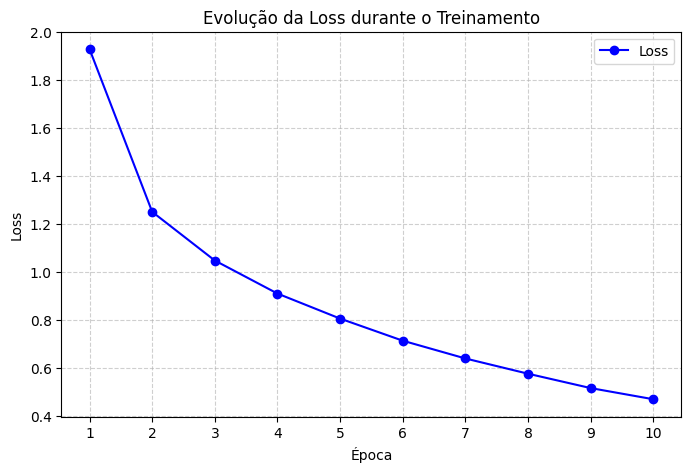

In [ ]:
import matplotlib.pyplot as plt


epochs = list(range(1, 11))  # De 1 a 10
loss_values = [
    1.9273817361005254, 1.2497477662195828, 1.0469766018685658, 
    0.9093783302610187, 0.8051424045933763, 0.7130342988561638, 
    0.6389789436912365, 0.5755000410072908, 0.5156397997036677, 
    0.4691770983627066
]


plt.figure(figsize=(8, 5))
plt.plot(epochs, loss_values, marker='o', linestyle='-', color='b', label="Loss")
plt.title("Evolução da Loss durante o Treinamento")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.xticks(epochs)  
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

Este trecho de código define uma função para avaliar o desempenho de um modelo de aprendizado profundo utilizando um conjunto de dados de teste e várias métricas de avaliação. Aqui está a descrição detalhada:

1. Importa bibliotecas necessárias: PyTorch, NumPy, Seaborn, Matplotlib e funções de métricas do Scikit-learn.
2. Define a função `evaluate_model` que recebe o modelo, o carregador de dados de teste (`test_loader`) e o dispositivo (CPU ou GPU).
3. Coloca o modelo em modo de avaliação.
4. Inicializa listas para armazenar previsões e rótulos verdadeiros.
5. Desabilita o cálculo de gradientes para economizar memória e melhorar a eficiência.
6. Itera sobre os mini-lotes de dados no `test_loader`, movendo dados para o dispositivo especificado.
7. Realiza a passagem para frente e obtém as previsões do modelo.
8. Calcula e imprime métricas de desempenho: acurácia, precisão, recall e relatório de classificação detalhado.

Em resumo, esta função avalia o modelo utilizando os dados de teste, calcula várias métricas de desempenho e imprime os resultados.

Acurácia no conjunto de teste: 77.83%
Precisão: 0.7908
Recall: 0.7783

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55       250
           1       0.86      0.71      0.78       250
           2       0.90      0.78      0.83       250
           3       0.87      0.78      0.82       250
           4       0.71      0.80      0.75       250
           5       0.70      0.60      0.65       250
           6       0.85      0.85      0.85       250
           7       0.87      0.88      0.88       250
           8       0.66      0.50      0.57       250
           9       0.61      0.82      0.70       250
          10       0.66      0.68      0.67       250
          11       0.84      0.83      0.83       250
          12       0.96      0.75      0.84       250
          13       0.89      0.73      0.80       250
          14       0.78      0.73      0.75       250
          15       0.77      0.50  

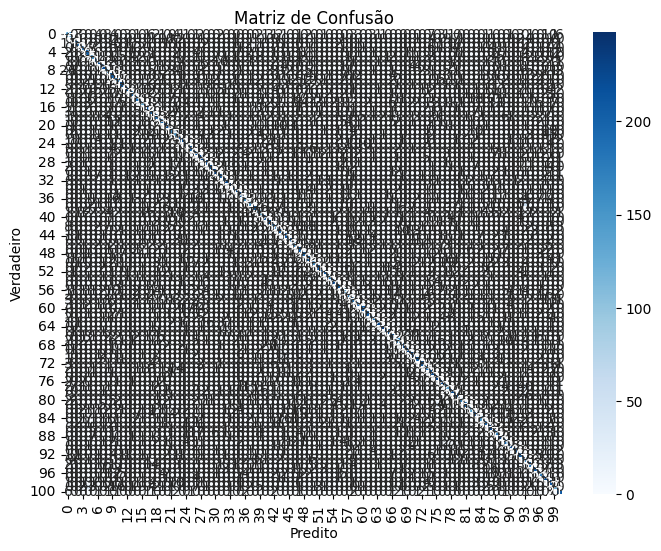

In [ ]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())  
            all_labels.extend(labels.cpu().numpy())  

    
    accuracy = accuracy_score(all_labels, all_preds) * 100
    precision = precision_score(all_labels, all_preds, average='weighted')  
    recall = recall_score(all_labels, all_preds, average='weighted')  
   
    print(f'Acurácia no conjunto de teste: {accuracy:.2f}%')
    print(f'Precisão: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print("\nRelatório de Classificação:\n", classification_report(all_labels, all_preds))


evaluate_model(model, test_loader, device)

Este trecho de código utiliza as bibliotecas `numpy`, `matplotlib`, `seaborn` e `pandas` para plotar gráficos de barras que mostram a precisão e o recall por classe para um modelo de aprendizado profundo. Aqui está a descrição detalhada:

1. Importa as bibliotecas necessárias: `numpy`, `matplotlib.pyplot`, `seaborn` e `pandas`.
2. Define uma lista de classes de 0 a 100.
3. Define arrays de valores de precisão e recall para cada classe.
4. Cria um DataFrame com as métricas de precisão e recall por classe.
5. Plota um gráfico de barras da precisão por classe utilizando `seaborn`.
6. Plota um gráfico de barras do recall por classe utilizando `seaborn`.

Em resumo, este código cria e exibe gráficos que mostram a precisão e o recall por classe, permitindo visualizar o desempenho do modelo em cada classe individualmente.

C:\Users\dival\AppData\Local\Temp\ipykernel_14292\3128141313.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Acurácia', 'Precisão', 'Recall'], y=[accuracy, precision, recall], palette='viridis')


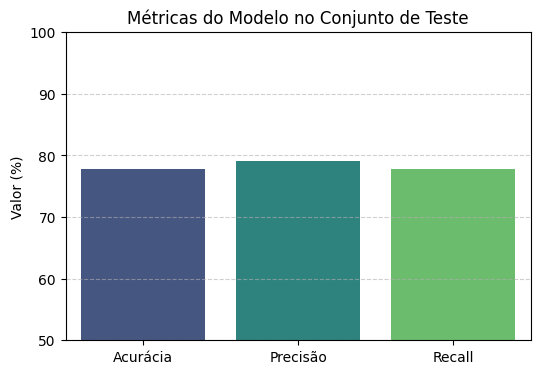

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir as métricas gerais
accuracy = 77.83
precision = 0.7908 * 100
recall = 0.7783 * 100

# Criar gráfico de barras para as métricas gerais
plt.figure(figsize=(6, 4))
sns.barplot(x=['Acurácia', 'Precisão', 'Recall'], y=[accuracy, precision, recall], palette='viridis')
plt.ylabel("Valor (%)")
plt.title("Métricas do Modelo no Conjunto de Teste")
plt.ylim(50, 100)  # Definir limites para melhor visualização
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

Este trecho de código utiliza as bibliotecas `numpy`, `matplotlib`, `seaborn` e `pandas` para plotar gráficos de barras que mostram a precisão e o recall por classe para um modelo de aprendizado profundo. Aqui está a descrição detalhada:

1. Importa as bibliotecas necessárias: `numpy`, `matplotlib.pyplot`, `seaborn` e `pandas`.
2. Define uma lista de classes de 0 a 100.
3. Define arrays de valores de precisão e recall para cada classe.
4. Cria um DataFrame com as métricas de precisão e recall por classe.
5. Plota um gráfico de barras da precisão por classe utilizando `seaborn`.
6. Plota um gráfico de barras do recall por classe utilizando `seaborn`.

Em resumo, este código cria e exibe gráficos que mostram a precisão e o recall por classe, permitindo visualizar o desempenho do modelo em cada classe individualmente.

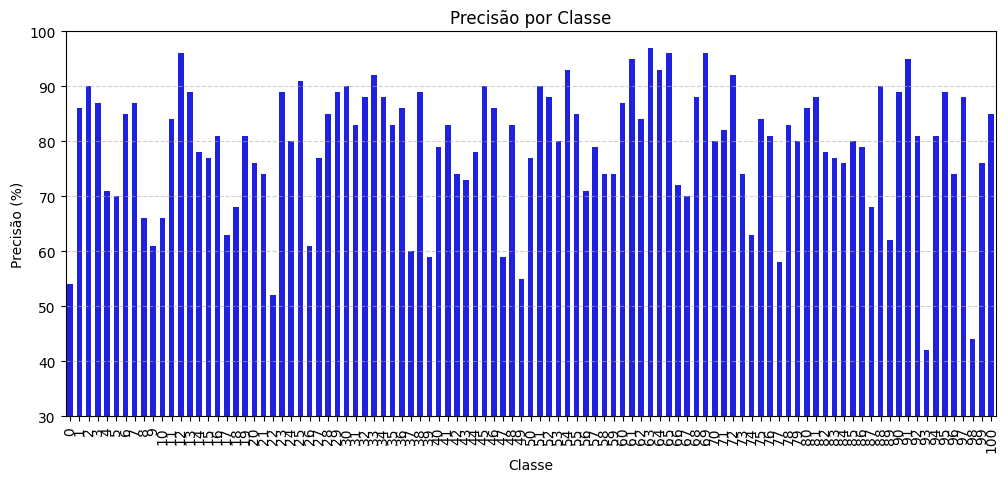

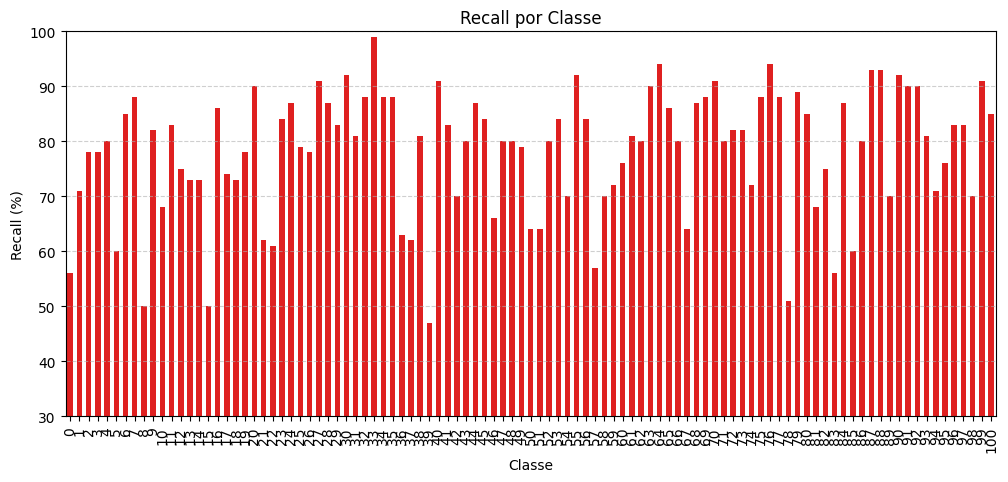

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


classes = list(range(101))


precision_values = np.array([
    0.54, 0.86, 0.90, 0.87, 0.71, 0.70, 0.85, 0.87, 0.66, 0.61, 0.66, 0.84, 0.96, 0.89, 0.78, 0.77, 0.81, 0.63, 0.68, 0.81,
    0.76, 0.74, 0.52, 0.89, 0.80, 0.91, 0.61, 0.77, 0.85, 0.89, 0.90, 0.83, 0.88, 0.92, 0.88, 0.83, 0.86, 0.60, 0.89, 0.59,
    0.79, 0.83, 0.74, 0.73, 0.78, 0.90, 0.86, 0.59, 0.83, 0.55, 0.77, 0.90, 0.88, 0.80, 0.93, 0.85, 0.71, 0.79, 0.74, 0.74,
    0.87, 0.95, 0.84, 0.97, 0.93, 0.96, 0.72, 0.70, 0.88, 0.96, 0.80, 0.82, 0.92, 0.74, 0.63, 0.84, 0.81, 0.58, 0.83, 0.80,
    0.86, 0.88, 0.78, 0.77, 0.76, 0.80, 0.79, 0.68, 0.90, 0.62, 0.89, 0.95, 0.81, 0.42, 0.81, 0.89, 0.74, 0.88, 0.44, 0.76, 0.85
]) * 100  

recall_values = np.array([
    0.56, 0.71, 0.78, 0.78, 0.80, 0.60, 0.85, 0.88, 0.50, 0.82, 0.68, 0.83, 0.75, 0.73, 0.73, 0.50, 0.86, 0.74, 0.73, 0.78,
    0.90, 0.62, 0.61, 0.84, 0.87, 0.79, 0.78, 0.91, 0.87, 0.83, 0.92, 0.81, 0.88, 0.99, 0.88, 0.88, 0.63, 0.62, 0.81, 0.47,
    0.91, 0.83, 0.70, 0.80, 0.87, 0.84, 0.66, 0.80, 0.80, 0.79, 0.64, 0.64, 0.80, 0.84, 0.70, 0.92, 0.84, 0.57, 0.70, 0.72,
    0.76, 0.81, 0.80, 0.90, 0.94, 0.86, 0.80, 0.64, 0.87, 0.88, 0.91, 0.80, 0.82, 0.82, 0.72, 0.88, 0.94, 0.88, 0.51, 0.89,
    0.85, 0.68, 0.75, 0.56, 0.87, 0.60, 0.80, 0.93, 0.93, 0.70, 0.92, 0.90, 0.90, 0.81, 0.71, 0.76, 0.83, 0.83, 0.70, 0.91, 0.85
]) * 100  


df_metrics = pd.DataFrame({'Classe': classes, 'Precisão (%)': precision_values, 'Recall (%)': recall_values})


plt.figure(figsize=(12, 5))
sns.barplot(x='Classe', y='Precisão (%)', data=df_metrics, color='blue', width=0.6)
plt.xlabel("Classe")
plt.ylabel("Precisão (%)")
plt.title("Precisão por Classe")
plt.xticks(rotation=90)  
plt.ylim(30, 100)  
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


plt.figure(figsize=(12, 5))
sns.barplot(x='Classe', y='Recall (%)', data=df_metrics, color='red', width=0.6)
plt.xlabel("Classe")
plt.ylabel("Recall (%)")
plt.title("Recall por Classe")
plt.xticks(rotation=90)  
plt.ylim(30, 100)  
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()